<a href="https://colab.research.google.com/github/sanikanarmitwar/MusicGenreClassification/blob/main/musicgenreIMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from zipfile import ZipFile
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import librosa

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images_original.zip to images_original.zip


In [ ]:
# extracts the data from zip file and stores in directory extract_path
def extract_zip(zip_path, extract_path):
    with ZipFile(zip_path, 'r') as zip_ref: #opens zip file in read mode
        zip_ref.extractall(extract_path)

def display_images(folder_path):
    exts = ['.png']

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            directory_name = root.split('/')[-1]
            file_path = os.path.join(root, file)    #root stores current directory being traversed while file stores file name
            if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
                img = cv2.imread(file_path)
                # cv2_imshow(img)
# store zip file path in zipfile
file = "images_original.zip"
extfolder = "extracted_folder"

# extract the contents of the zip file
extract_zip(file, extfolder)

# display images in the extracted folder
display_images(extfolder)

(218, 336)


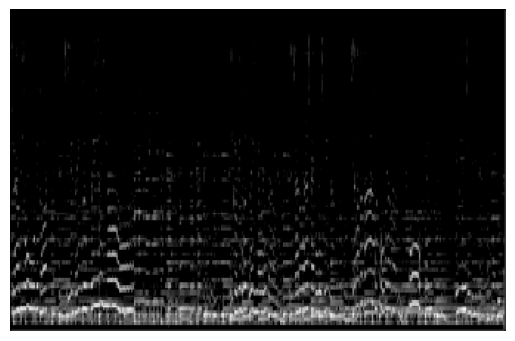

In [ ]:
# extracting labels and cropping spectrogram images
y = []
exts = ['.png']
spectrogram = []

# Assuming extfolder is defined somewhere in your code
for root, dirs, files in os.walk(extfolder):
    for file in files:
        label = root.split('/')[-1]
        file_path = os.path.join(root, file)    # root stores current directory being traversed while file stores file name
        if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
            img = cv2.imread(file_path, 0)

            if img is None:
                print("Error loading image:", file_path)
                continue

            # Threshold the image to remove white borders and crop it
            _, binary = cv2.threshold(img, 254, 255, cv2.THRESH_BINARY_INV)
            kernel = np.ones((5,5), np.uint8)
            binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
            contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if contours:
                max_contour = max(contours, key=cv2.contourArea)
                x, k, w, h = cv2.boundingRect(max_contour)
                cropped_image = img[k:k+h, x:x+w]
            else:
                cropped_image = img

            # Add the cropped image to the spectrogram list
            spectrogram.append(cropped_image)

            # Append the label to the y list
            y.append(label)  # Convert label to string if necessary

# Display the shape of the 100th image in the spectrogram list
print(spectrogram[0].shape)

# Display the 100th image in the spectrogram list
plt.imshow(spectrogram[0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
linear_spectrogram = []
for image in spectrogram:
    image = image.astype(float)
    linear = librosa.feature.inverse.mel_to_stft(image) #  Inverse Mel transform
    linear_spectrogram.append(linear)

In [ ]:
# spectral bandwidth
mean_spectral_bandwidth = []
var_spectral_bandwidth = []
for image in linear_spectrogram:
    spectral_bandwidths = librosa.feature.spectral_bandwidth(S=image)
    mean = np.mean(spectral_bandwidths)
    mean_spectral_bandwidth.append(mean)

    var = np.var(spectral_bandwidths)
    var_spectral_bandwidth.append(var)
    print(mean)

2065.663563586142
1810.1157749282706
2787.972157967765
2096.7748268169
1221.0698070823228
2805.4596805882506
1596.693300837312
1986.007744366055
2899.7379228804252
2744.557468308789
2631.7774600165126
1902.4034332907058
1883.7923558677855
2637.28355699771
2571.008960324824
2061.6757128295844
1564.3592792051222
1825.5046519829953
1857.204064884956
2235.601037174448
1940.893347995574
1871.1989185486698
1794.3360188006025
1729.1333710354581
1811.9432699739712
2034.486618501115
2618.2982252985103
1668.4779207922995
2790.6171459128354
1907.094694652045
1726.6331561060242
2128.555253734851
1747.4889948276018
2824.0087161011775
2812.471565705297
2874.5618715771866
1947.1221119506351
1904.1531683782578
1804.8697558106928
2856.6592418575206
2167.3498200855092
2586.2599118400663
2585.017202608695
2580.104740176298
1862.4737064122335
2183.750980429675
1561.6960306006306
1768.4594786188977
2002.1086787478434
2820.3300112978613
1820.0546944401524
2717.1429147283816
1698.2695221655874
2632.738294242

In [ ]:
# spectral centroid
mean_spectral_centroid = []
var_spectral_centroid = []

for image in linear_spectrogram:
    spectral_centroid = librosa.feature.spectral_centroid(S=image)
    mean = np.mean(spectral_centroid)
    mean_spectral_centroid.append(mean)

    var = np.var(spectral_centroid)
    var_spectral_centroid.append(var)
    print(mean)

7745.551712748005
8323.152469768376
6534.615303054627
8039.80513491999
9129.613630774547
6625.130066906911
8856.190868489273
8065.603751780436
6521.263607305438
6878.697359485854
6832.189004722926
8341.136345261873
7984.823264466562
7033.7899346279
7887.431013235856
7556.34053012431
8593.980528244481
8082.589162407623
8374.360029473448
7649.8872997092785
7804.354791162454
8365.590017446286
8368.925911343593
8302.247135304719
8333.401581906206
7735.914660210552
7320.6580568957625
8219.226407686932
6457.387027681996
8234.761444323956
8379.709593918062
7868.57623517049
8312.32396201198
6191.0459354694285
6924.501235925645
6709.43728771975
8272.322594483185
8237.153410340465
8523.71473232862
6448.973273304397
8045.416517219348
7245.911781107774
6724.662722807702
6809.9363445271265
8334.55507938233
7847.486284273841
8791.250847706262
8350.265173503538
8051.0246955755465
6376.215418492097
8494.785638969846
7386.584363505774
8520.975351808429
7265.587045518279
8107.971523562625
7124.785556951

In [ ]:
# spectral contrast
mean_spectral_contrast = []
var_spectral_contrast = []

for image in linear_spectrogram:
    spectral_contrast = librosa.feature.spectral_contrast(S=image)
    mean = np.mean(spectral_contrast)
    mean_spectral_contrast.append(mean)

    var = np.var(spectral_contrast)
    var_spectral_contrast.append(var)
    print(mean)

43.27430092778322
32.484574115765454
51.121816369883334
42.33014604095851
24.473279948205974
42.880591425925964
29.122598043113154
36.71006737544561
47.01848924126343
47.03299538518115
52.14607091127004
44.60165659550527
41.36792518777967
47.66237244682893
52.090485242718934
38.595038829781046
38.16401405847197
37.54553412600462
36.007061746026
42.83281700351063
36.07046221880642
34.65468963936131
32.018728529889735
35.862883177887994
37.188176682432776
39.1476826127278
43.07187541104196
35.93709636831038
50.214849629820286
35.678367386728475
31.16761640231024
41.292188247861276
34.35700971402708
38.91399336271692
44.17322747351849
48.607806072509376
39.2496449326059
33.83030330060891
35.90782177814732
41.717441878863816
42.89504477204337
50.712049922934334
58.18145901295556
51.45830953371311
33.31718867336954
41.43165243695122
28.91285910613618
34.734811645615935
40.00373383009353
57.47767238615097
35.46610060081452
54.13123425895347
32.90224480688158
42.41556490640017
47.695072782243

In [ ]:
# spectral rolloff
mean_spectral_rolloff= []
var_spectral_rolloff= []

for image in linear_spectrogram:
    spectral_rolloff = librosa.feature.spectral_rolloff(S=image)
    mean = np.mean(spectral_rolloff)
    mean_spectral_rolloff.append(mean)

    var = np.var(spectral_rolloff)
    var_spectral_rolloff.append(var)

    print(mean)

9761.141967773438
10315.109252929688
9659.275817871094
10128.488159179688
10406.977844238281
9770.947265625
10590.618896484375
10124.803161621094
9762.808227539062
9928.152465820312
9749.830627441406
10157.487487792969
9790.68603515625
9929.017639160156
10189.306640625
9611.146545410156
10100.289916992188
9813.020324707031
10338.693237304688
10015.791320800781
9796.005249023438
10385.861206054688
10246.023559570312
9925.717163085938
10143.324279785156
9937.605285644531
10051.487731933594
9795.011901855469
9562.568664550781
10235.385131835938
10099.200439453125
10067.477416992188
10157.199096679688
9470.411682128906
9935.105895996094
9794.659423828125
10184.564208984375
10392.013549804688
10260.379028320312
9704.713439941406
10163.095092773438
9960.195922851562
9501.910400390625
9703.303527832031
10434.599304199219
10066.099548339844
10311.616516113281
10143.1640625
10077.186584472656
9511.555480957031
10297.261047363281
10063.984680175781
10350.613403320312
10091.029357910156
10075.135

In [ ]:
# mfcc
mean_mfcc= []
var_mfcc= []

for image in linear_spectrogram:
    mfcc = librosa.feature.mfcc(S=image, n_mfcc = 20)
    mean = np.mean(mfcc)
    mean_mfcc.append(mean)

    var = np.var(mfcc)
    var_mfcc.append(var)

    print(mean)

4.355573536907209
4.6199105469480894
9.386277543942377
5.848194105643373
2.2970026800321373
11.087641086836943
2.8213920045832825
6.296835637259146
10.708834293693174
9.03108817082084
7.589569979908107
6.174199860825594
4.645192673246085
9.45679096027727
5.040199390386928
2.9172922797709866
4.855978906514213
5.495950810105678
5.130082810438509
7.847558697173262
4.845238542260642
4.523714490649552
4.780464505196932
4.338244551679634
6.04713809666724
4.423151157421597
8.144824645791601
3.9969902575518095
8.980393435858952
5.812735530170843
2.3914950990369808
4.65718482818128
4.060989901647401
9.46117867140722
10.32835032489662
8.56693522537948
5.420129846443152
4.239138982422462
3.9109035440522293
11.165559055744694
5.267724082980935
8.58943601111568
9.141309178227825
7.843178157513915
3.2098785489815955
7.486764233871753
3.148659228632571
4.655177742926812
5.828390092836236
8.621677555751468
4.7089308844875495
7.255431520467342
4.132563220940955
8.193252567568125
6.76792316143134
8.8871

In [ ]:
# chroma
mean_chroma= []
var_chroma= []

for image in linear_spectrogram:
    chroma = librosa.feature.chroma_stft(S=image)
    mean = np.mean(chroma)
    mean_chroma.append(mean)

    var = np.var(chroma)
    var_chroma.append(var)

    print(mean)

0.5779688323263569
0.550658119629645
0.7657327706746496
0.5898893589015122
0.3917593173948838
0.7519102653468569
0.3839967723132537
0.5846003005868441
0.7716647478095547
0.7243855162137603
0.6980124183139443
0.6041471100267651
0.5085757684685283
0.7262874884536167
0.580568818256325
0.5202159052128615
0.5297311551754539
0.4875024041274616
0.5479479077036313
0.6466609988344078
0.5473853848001601
0.4898912924771183
0.5350577133013362
0.4626638708756914
0.5886019155751295
0.553798510369541
0.6935099775709833
0.5028013200994966
0.7991700994867629
0.5371957634148014
0.40749142268467176
0.5552119440458441
0.5066566424616785
0.7800766384850006
0.7391802831199539
0.7425492593939609
0.5850925390542878
0.4788871529240038
0.4911096314037852
0.7844237600442442
0.5666799917617541
0.7007669887800133
0.777461831015858
0.7146265288890095
0.4599534600726545
0.6314191164581114
0.45832709048249887
0.5410512120094211
0.5955966275098528
0.7209841428028508
0.479552001403658
0.6602849099378331
0.5055938254364

In [ ]:
# root mean square
mean_rms = []
var_rms = []

for image in linear_spectrogram:
    waveform = librosa.griffinlim(image)
    hop_length = 512
    rms = librosa.feature.rms(y=waveform, hop_length=hop_length)

    mean = np.mean(rms)
    mean_rms.append(mean)

    var = np.var(rms)
    var_rms.append(var)
    print(mean)

0.66750824
0.5542922
0.942381
0.6457572
0.41244933
0.90934384
0.40118244
0.6968912
0.94048625
0.8310746
0.824549
0.6946145
0.63580304
0.8192017
0.6957284
0.49974406
0.6635581
0.5943317
0.573757
0.76382726
0.61180407
0.5492816
0.5876328
0.5330203
0.6492377
0.4945137
0.8024973
0.5995249
0.944789
0.6103467
0.44157392
0.58157
0.5390843
0.9348777
0.87413996
0.9234522
0.64153683
0.51257426
0.537603
0.93440145
0.64101255
0.8398904
0.8894933
0.7906557
0.43776813
0.7592624
0.5198598
0.59339476
0.6474459
0.8461765
0.561016
0.8071823
0.5409692
0.75166464
0.71139336
0.85014904
0.4892559
0.73012245
0.62050223
0.5330264
0.4480539
0.69908804
0.9139507
0.7751605
0.8594201
0.9355531
0.6095207
0.4369015
0.6921494
0.48153168
0.7475882
0.8161063
0.6128873
0.7586878
0.45371738
0.8306716
0.8175744
0.8019898
0.6057229
0.80583936
0.7691749
0.8826228
0.88435656
0.58760715
0.6028184
0.8620363
0.9006522
0.8248477
0.3504737
0.6099351
0.4283507
0.86485964
0.5334393
0.5341188
0.6034979
0.7047571
0.69280624
0.549861

In [ ]:
# zero crossing rate
mean_zcr = []
var_zcr = []

for image in linear_spectrogram:
    waveform = librosa.griffinlim(image)
    hop_length = 512
    zcr = librosa.feature.zero_crossing_rate(y=waveform, hop_length=hop_length)

    mean = np.mean(zcr)
    mean_zcr.append(mean)

    var = np.var(zcr)
    var_zcr.append(var)
    print(mean)

0.7045694986979166
0.7508937290736607
0.6038222539992559
0.7235180082775298
0.8259611583891369
0.6092456635974702
0.794219970703125
0.7469584147135416
0.6096482049851191
0.6295747302827381
0.6208554222470238
0.7683512369791666
0.7286144438244048
0.6452186221168155
0.7231343587239584
0.6921314057849702
0.7717662992931548
0.7320309593563988
0.7581467401413691
0.6927621023995536
0.6966436476934523
0.7520025344122023
0.7682553245907738
0.7523716517857143
0.7592744373139881
0.6972481863839286
0.68280029296875
0.7437686011904762
0.5974237351190477
0.7456694103422619
0.7436131068638393
0.7028590611049107
0.7507978166852679
0.5677344912574405
0.6506231398809523
0.6255769275483631
0.7541344052269345
0.7394743419828869
0.7731962658110119
0.5980326334635416
0.7327052525111607
0.6799345470610119
0.6232241675967262
0.6135893322172619
0.7427891322544643
0.7260989234561012
0.7878955659412202
0.7648155575706845
0.7312302362351191
0.5836181640625
0.7694905598958334
0.6884765625
0.7689485095796131
0.666

In [ ]:
X = pd.DataFrame()
X['mean_spectral_bandwidth'] = mean_spectral_bandwidth
X['var_spectral_bandwidth'] = var_spectral_bandwidth
X['mean_spectral_centroid'] = mean_spectral_centroid
X['var_spectral_centroid'] = var_spectral_centroid
X['mean_spectral_contrast'] = mean_spectral_contrast
X['var_spectral_contrast'] = var_spectral_contrast
X['mean_spectral_rolloff'] = mean_spectral_rolloff
X['var_spectral_rolloff'] = var_spectral_rolloff
X['mean_mfcc'] = mean_mfcc
X['var_mfcc'] = var_mfcc
X['mean_chroma'] = mean_chroma
X['var_chroma'] = var_chroma
X['mean_rms'] = mean_rms
X['var_rms'] = var_rms
X['mean_zcr'] = mean_zcr
X['var_zcr'] = var_zcr
display(X)

,mean_spectral_bandwidth,var_spectral_bandwidth,mean_spectral_centroid,var_spectral_centroid,mean_spectral_contrast,var_spectral_contrast,mean_spectral_rolloff,var_spectral_rolloff,mean_mfcc,var_mfcc,mean_chroma,var_chroma,mean_rms,var_rms,mean_zcr,var_zcr
0,2065.663564,85949.877208,7745.551713,1.811779e+05,43.274301,1378.276637,9761.141968,26954.679703,4.355574,15830.684325,0.577969,0.067065,0.667508,0.002933,0.704569,0.001997
1,1810.115775,250624.031908,8323.152470,6.142123e+05,32.484574,1342.621052,10315.109253,60462.671360,4.619911,11653.869908,0.550658,0.091802,0.554292,0.007701,0.750894,0.004876
2,2787.972158,14684.771234,6534.615303,9.263097e+04,51.121816,1381.050486,9659.275818,43140.506109,9.386278,33476.210769,0.765733,0.023177,0.942381,0.002456,0.603822,0.001163
3,2096.774827,279571.599517,8039.805135,4.729527e+05,42.330146,1449.451738,10128.488159,36856.220579,5.848194,15074.929327,0.589889,0.072721,0.645757,0.007288,0.723518,0.004203
4,1221.069807,370173.082365,9129.613631,8.042568e+05,24.473280,1078.028258,10406.977844,99371.052550,2.297003,6204.511600,0.391759,0.113161,0.412449,0.012667,0.825961,0.006340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2341.059589,403114.341155,7463.132027,1.542255e+06,35.914867,1399.826131,10029.281616,196578.399902,8.604584,23090.560030,0.667117,0.074576,0.766954,0.023922,0.700236,0.009066
995,2695.143294,57488.235906,6609.703651,2.047828e+05,50.091026,1387.526991,9613.998413,102304.330682,11.022030,28956.327093,0.753992,0.028514,0.872872,0.014695,0.606203,0.001963
996,2813.649742,141197.678780,6309.919766,7.088902e+05,43.381134,1367.013119,9489.253235,474624.081196,8.215835,22681.730272,0.709315,0.057932,0.758901,0.027687,0.581312,0.005521
997,2333.113171,80928.735882,7465.239790,2.522238e+05,42.138946,1375.814614,9952.313232,43783.232309,9.006825,25212.672664,0.697731,0.044446,0.818623,0.010605,0.685418,0.002169


In [ ]:
#train test split
X = np.array(X)
y = np.array(y)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_categorical = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# X_train = X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (799, 16)
Shape of y_train: (799,)
Shape of X_test: (200, 16)
Shape of y_test: (200,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy*100, "%")

Decision Tree Classifier Accuracy: 33.0 %


In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Classifier Accuracy:", svm_accuracy*100, "%")

SVM Classifier Accuracy: 28.000000000000004 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_acc = []
for k in np.arange(1,15,1):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_pred = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    print("kNN Classifier Accuracy for k =",k, ":", knn_accuracy*100, "%")
    knn_acc.append(knn_accuracy)

# xseq = np.linspace(1, 14, 14)
# plt.plot(xseq, knn_acc)
# plt.xlabel("k")
# plt.ylabel("accuracy")
# plt.show()

kNN Classifier Accuracy for k = 1 : 25.0 %
kNN Classifier Accuracy for k = 2 : 21.0 %
kNN Classifier Accuracy for k = 3 : 18.0 %
kNN Classifier Accuracy for k = 4 : 20.5 %
kNN Classifier Accuracy for k = 5 : 20.5 %
kNN Classifier Accuracy for k = 6 : 21.5 %
kNN Classifier Accuracy for k = 7 : 24.0 %
kNN Classifier Accuracy for k = 8 : 24.0 %
kNN Classifier Accuracy for k = 9 : 26.5 %
kNN Classifier Accuracy for k = 10 : 26.5 %
kNN Classifier Accuracy for k = 11 : 25.0 %
kNN Classifier Accuracy for k = 12 : 26.5 %
kNN Classifier Accuracy for k = 13 : 27.500000000000004 %
kNN Classifier Accuracy for k = 14 : 27.500000000000004 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_acc = []
for k in np.arange(10,120,10):

    rf_classifier = RandomForestClassifier(n_estimators=k, random_state=42)
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Classifier Accuracy for n_estimators =",k, ":", accuracy*100, "%")
    rf_acc.append(accuracy)

# xseq = np.linspace(10, 110, 11)
# plt.plot(xseq, rf_acc)
# plt.xlabel("n_estimators")
# plt.ylabel("accuracy")
# plt.show()

Random Forest Classifier Accuracy for n_estimators = 10 : 47.0 %
Random Forest Classifier Accuracy for n_estimators = 20 : 49.0 %
Random Forest Classifier Accuracy for n_estimators = 30 : 54.0 %
Random Forest Classifier Accuracy for n_estimators = 40 : 54.50000000000001 %
Random Forest Classifier Accuracy for n_estimators = 50 : 57.49999999999999 %
Random Forest Classifier Accuracy for n_estimators = 60 : 57.99999999999999 %
Random Forest Classifier Accuracy for n_estimators = 70 : 56.99999999999999 %
Random Forest Classifier Accuracy for n_estimators = 80 : 57.49999999999999 %
Random Forest Classifier Accuracy for n_estimators = 90 : 56.00000000000001 %
Random Forest Classifier Accuracy for n_estimators = 100 : 55.00000000000001 %
Random Forest Classifier Accuracy for n_estimators = 110 : 55.50000000000001 %
